# Machine Learning using Python - Unsupervised Learning


Priyaranjan Mohanty

<b>Unsupervised Learning </b> is a class of Machine Learning techniques to find the patterns in data. The data given to unsupervised algorithm are not labelled, which means only the input variables(X) are given with no corresponding output variables. In unsupervised learning, the algorithms are left to themselves to discover interesting structures in the data.

### Supervised Vs Unsupervised Learning.


In supervised learning, the system tries to learn from the previous examples that are given. (On the other hand, in unsupervised learning, the system attempts to find the patterns directly from the example given.) So if the dataset is labelled it comes under a supervised problem, it the dataset is unlabelled then it is an unsupervised problem.

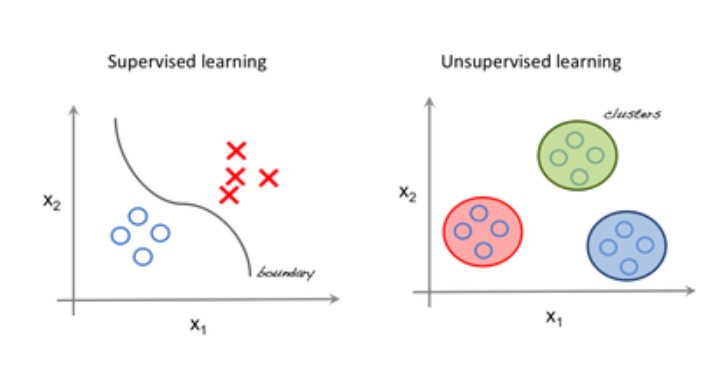

The image to the left is an example of supervised learning; we use classification techniques to segregate the data points into individual Classes . 

While in unsupervised learning ( image to the right ), the inputs are segregated based on similarity of the features and the prediction is based on which cluster it belonged.

### Clustering 


Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.


Let’s understand this with an example. Suppose, you are the head of a rental store and wish to understand preferences of your costumers to scale up your business. Is it possible for you to look at details of each costumer and devise a unique business strategy for each one of them? Definitely not. But, what you can do is to cluster all of your costumers into say 10 groups based on their purchasing habits and use a separate strategy for costumers in each of these 10 groups. And this is what we call clustering.


Clustering is one of the most frequently utilized forms of unsupervised learning. 



### Types of Clustering

Broadly speaking, clustering can be divided into two subgroups :

<b>Hard Clustering:</b> In hard clustering, each data point either belongs to a cluster completely or not. For example, in the above example each customer is put into one group out of the 10 groups.

<b>Soft Clustering:</b> In soft clustering, instead of putting each data point into a separate cluster, a probability or likelihood of that data point to be in those clusters is assigned. For example, from the above scenario each costumer is assigned a probability to be in either of 10 clusters of the retail store.


A hard clustering means we have non-overlapping clusters, where each instance belongs to one and only one cluster. In a soft clustering method, a single individual can belong to multiple clusters, often with a confidence (belief) associated with each cluster.

### Types of clustering algorithms

<b>Connectivity models:</b> As the name suggests, these models are based on the notion that the data points closer in data space exhibit more similarity to each other than the data points lying farther away. These models can follow two approaches. In the first approach, they start with classifying all data points into separate clusters & then aggregating them as the distance decreases. In the second approach, all data points are classified as a single cluster and then partitioned as the distance increases. Also, the choice of distance function is subjective. These models are very easy to interpret but lacks scalability for handling big datasets. Examples of these models are hierarchical clustering algorithm and its variants.


<b>Centroid models:</b> These are iterative clustering algorithms in which the notion of similarity is derived by the closeness of a data point to the centroid of the clusters. K-Means clustering algorithm is a popular algorithm that falls into this category. In these models, the no. of clusters required at the end have to be mentioned beforehand, which makes it important to have prior knowledge of the dataset. These models run iteratively to find the local optima.


In this session, we’ll explore two of the most common forms of clustering: 

   1) k-means Clustering 
    
   2) hierarchical Clustering

#### Data to be used for Unspuervised Learning examples in this script 

In this session we use, Iris dataset for making our very first predictions. 

The dataset contains a set of 150 records under 5 attributes — 

    Petal Length , 
    
    Petal Width , 
    
    Sepal Length , 
    
    Sepal width and 
    
    Class. 

Iris Setosa, Iris Virginica and Iris Versicolor are the three classes. 


Objective for our Unsupervised Algorithm is to , we give these four features of the Iris flower as input and predict which class it belongs to.

### Load the Data 

In [1]:
# Importing Modules

from sklearn import datasets

import matplotlib.pyplot as plt


In [2]:
# Loading dataset

iris_df = datasets.load_iris()

In [3]:
# Available methods on dataset

print(dir(iris_df))

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


In [4]:
# Get the description of the Iris Data set 

print(iris_df.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
# print the data component ( predictor variables ) of Iris dataset

print(iris_df.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [6]:
# Features

print(iris_df.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
# Targets

print(iris_df.target)



# Target Names

print(iris_df.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [8]:
label = {0: 'red', 1: 'blue', 2: 'green'}

#### Data Visualization

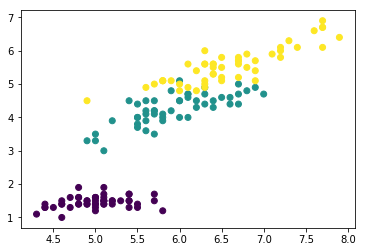

In [9]:
# Dataset Slicing

x_axis = iris_df.data[:, 0]  # Sepal Length

y_axis = iris_df.data[:, 2]  # Sepal Width



# Plotting

plt.scatter(x_axis, y_axis, c=iris_df.target)

plt.show()

#### Clustering

In clustering, the data is divided into several groups. In plain words, the aim is to segregate groups with similar traits and assign them into clusters.
Visual Example,

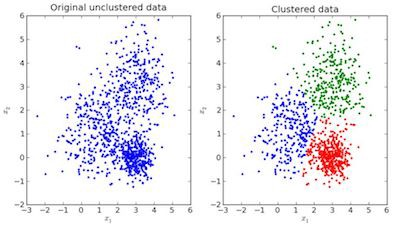

In the above image, the image to the left is raw data where the classification isn’t done, the image in the right is clustered(the data is classified based on its features). When an input is given which is to be predicted then it checks in the cluster it belongs based on it’s features, and the prediction is made.

## 1) K-Means Clustering in Python

K means is an iterative clustering algorithm that aims to find local maxima in each iteration. Initially desired number of clusters are chosen. Since we know that there are 3 classes involved, we program the algorithm to group the data into 3 classes, by passing the parameter “n_clusters” into our KMeans model. Now randomly three points(inputs) are assigned into three cluster. Based on the centroid distance between each points the next given inputs are segregated into respected clusters. Now, re-computing the centroids for all the clusters.

#### K-means Overview

 Before diving into the dataset, let us briefly discuss how k-means works:

1) The process begins with k centroids initialised at random.

2) These centroids are used to assign points to its nearest cluster.

3) The mean of all points within the cluster is then used to update the position of the centroids.

4) The above steps are repeated until the values of the centroids stabilise.

##### K Means Implementation in Python.

In [10]:
# Importing Modules

from sklearn import datasets

from sklearn.cluster import KMeans

In [11]:
# Declaring Model

KMean_Clstr_model = KMeans(n_clusters=3)

In [12]:
KMean_Clstr_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
# Fitting Model

KMean_Clstr_model.fit(iris_df.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
# Predicitng a single input

predicted_label = KMean_Clstr_model.predict([[7.2, 3.5, 0.8, 1.6]])

predicted_label

array([1])

In [15]:
# Prediction on the entire data

all_predictions = KMean_Clstr_model.predict(iris_df.data)

all_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

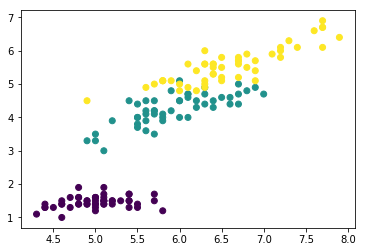

In [16]:
# Plotting with Original Target data 

plt.scatter(x_axis, y_axis, c=iris_df.target)

plt.show()

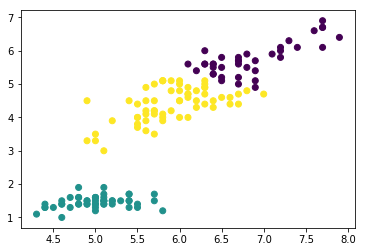

In [17]:
# Plotting with predicted Target data 

plt.scatter(x_axis, y_axis, c=all_predictions)

plt.show()

### Case Study : Clustering using the K-Means Clustering 


In this Case Study , 

        a) We will apply K-Means clustering on wholesale customer dataset
          
        b) We will also understand how to use the elbow method as a way to estimate the value k.

### The dataset

 The dataset we will study refers to clients of a wholesale distributor. It contains information such as clients annual spend on fresh product, milk products, grocery products etc. Below is some more information an each feature:

1) FRESH: annual spending (m.u.) on fresh products (Continuous)

2) MILK: annual spending (m.u.) on milk products (Continuous)

3) GROCERY: annual spending (m.u.) on grocery products (Continuous)

4) FROZEN: annual spending (m.u.) on frozen products (Continuous)

5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)

6) DELICATESSEN: annual spending (m.u.) on delicatessen products (Continuous)

7) CHANNEL: customer channels - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)

8) REGION: customer regions - Lisnon, Oporto or Other (Nominal)

In [18]:
# Import required packages

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [19]:
# Read in data and inspect the first 5 records.

Whl_sl_data = pd.read_csv('Wholesale customers data.csv')

Whl_sl_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [20]:
Whl_sl_data.shape

(440, 8)

In [23]:
# split of categorical and continuous features

categorical_features = ['Channel', 'Region']

continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

Descriptive statistics below shows on average clients spend the most on fresh groceries and the least on delicassen.

In [24]:
Whl_sl_data[continuous_features].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Convert the categorical data into Numerical data 

In [25]:
categorical_features

['Channel', 'Region']

In [26]:
for col in categorical_features:
    dummies = pd.get_dummies(Whl_sl_data[col], prefix=col)
    Whl_sl_data = pd.concat([Whl_sl_data, dummies], axis=1)
    Whl_sl_data.drop(col, axis=1, inplace=True)

    
Whl_sl_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


To give equal importance to all features, we need to scale the continuous features. We will be using scikit-learn’s MinMaxScaler

In [27]:
Min_Max_Scl = MinMaxScaler()

Min_Max_Scl.fit(Whl_sl_data)

data_transformed = Min_Max_Scl.transform(Whl_sl_data)

C:\Users\itzpr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [28]:
data_transformed.shape

(440, 11)

In [29]:
data_transformed

array([[0.11294004, 0.13072723, 0.08146416, ..., 0.        , 0.        ,
        1.        ],
       [0.06289903, 0.13282409, 0.10309667, ..., 0.        , 0.        ,
        1.        ],
       [0.05662161, 0.11918086, 0.08278992, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.1295431 , 0.21013575, 0.32594285, ..., 0.        , 0.        ,
        1.        ],
       [0.091727  , 0.02622442, 0.02402535, ..., 0.        , 0.        ,
        1.        ],
       [0.02482434, 0.02237109, 0.02702178, ..., 0.        , 0.        ,
        1.        ]])

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.

What is Inertia 

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares.

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion.

Inertia can be recognized as a measure of how internally coherent clusters are.

In [30]:
# Create / initialize an empty list 
Sum_of_squared_distances = []

K_Clstr_to_check = range(2,15)

for k in K_Clstr_to_check:
    km = KMeans(n_clusters=k)
    km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

In [31]:
Sum_of_squared_distances

[213.39898477020844,
 117.07252399254907,
 75.94845856513454,
 37.922437718162826,
 19.418928179725288,
 15.67916418107215,
 13.129100808295878,
 11.736772658017706,
 10.659848501049456,
 9.711927016617429,
 8.835350291351252,
 8.297051778312188,
 7.66955640161428]

As k increases, the sum of squared distance tends to zero. Imagine we set k to its maximum value n (where n is number of samples) each sample will form its own cluster meaning sum of squared distances equals zero.

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

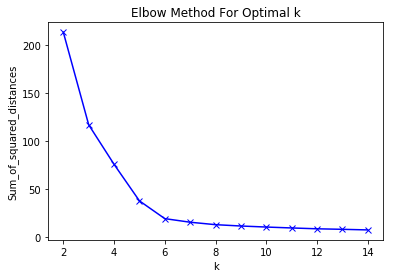

In [32]:
plt.plot(K_Clstr_to_check, Sum_of_squared_distances, 'bx-')

plt.xlabel('k')

plt.ylabel('Sum_of_squared_distances')

plt.title('Elbow Method For Optimal k')

plt.show()

In the plot above the elbow is at k=5 indicating the optimal k for this dataset is 6

In [35]:
data_transformed.shape

(440, 11)

In [33]:
km_5 = KMeans(n_clusters=6)

km_5.fit(data_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
km_5.predict(data_transformed)

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 5,
       2, 2, 5, 5, 2, 2, 2, 5, 2, 5, 2, 5, 2, 5, 2, 2, 5, 2, 5, 2, 5, 2,
       2, 2, 2, 5, 2, 2, 5, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 5, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       5, 2, 5, 2, 5, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 3, 4, 3, 4, 4, 3, 4,